In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

# EM parameter estimator


A, B, C three coins.

A head ->B
A tail ->C

B head ->1
B tail ->0

C head ->1
C tail ->0


A is a hidden variable or called latent variable

$P(y|\theta) = \sum_{z}^{}P(y,z|\theta) = \sum_{z} P(z|\theta)P(y|z, \theta)$


In [2]:
# Three coins model
 
pi_i0 = 0.4
p_i0 = 0.6
q_i0 = 0.7

seq = [1,1,0,1,0,0,1,0,1,1]
seq_vector = np.array(seq)
'''

theta_0 = {pi_0, p_0, q_0}

P（y|theta)
= pi * p^y * (1-p)**(1-y) + (1-pi) * q**y * (1-q)**(1-y)


'''

'\n\ntheta_0 = {pi_0, p_0, q_0}\n\nP（y|theta)\n= pi * p^y * (1-p)**(1-y) + (1-pi) * q**y * (1-q)**(1-y)\n\n\n'

In [3]:
# calculate the P(A), based on the parameters assumed, E steps

def ComputeHiddenP(pi, p, q, y):
    '''
    pi, P(A) latent variable probability
    p,  P(B)
    q,  P(C)
    y,  coin sequence
    
    return mu, P(B) based on the assumed parameters
    '''
    mu = []
    for y_i in y:
        mu_i = (pi * p**y_i * (1-p)**(1-y_i))/(pi * p**y_i * \
                        (1-p)**(1-y_i) + (1-pi) * q**y_i * (1-q)**(1-y_i))
        mu.append(mu_i)
    return mu



In [4]:
def UpdateParameters(mu, y):
    '''
    mu, numpy array
    
    '''
    seq_vector = np.array(y)
    pi = np.sum(mu)/len(mu)
    p_i = (np.dot(mu,seq_vector.transpose()))/(np.sum(mu))
    q_i = (np.dot(1 - np.array(mu),seq_vector.transpose()))/(np.sum(1 - np.array(mu)))
    return pi, p_i, q_i

In [6]:
# initial
pi_0, p_0, q_0 = 0.4, 0.6, 0.7


# iter 1
mu_1 = np.array(ComputeHiddenP(pi_0,p_0,q_0, seq))
pi_1, p_1, q_1 = UpdateParameters(mu_1, seq_vector)

# iter 2
mu_2 = np.array(ComputeHiddenP(pi_1, p_1, q_1, seq))
pi_2, p_2, q_2 = UpdateParameters(mu_2, seq_vector)

# iter 3

mu_3 = np.array(ComputeHiddenP(pi_2, p_2, q_2, seq))
pi_3, p_3, q_3 = UpdateParameters(mu_3, seq_vector)

print(pi_3, p_3, q_3)

0.40641711229946526 0.5368421052631578 0.6432432432432432


# Gaussian Mixture Model

Clustering the following sequence
-67, -48, 6, 8, 14, 16, 23, 24, 28, 29, 41, 49, 56, 60, 75

Estimate the parameters for 2 Gaussian distributions  

mu_1, sigma_1, mu_2, sigma_2, alpha_k1, alpha_k2
alpha_k1 + alpha_k2 = 1



In [7]:
# Gaussian probability density calculating
def GaussianFunction(x, mean, std):
    '''
    x : array
    mean : array
    std : array
    '''  
    return (1/(np.sqrt(2 * np.pi)* std)) * np.exp(-1 * (x - mean)* (x - mean)/(2 * std**2))

In [8]:
# Complete data log likelihood function, basically this is the target function which need to be optimized


def LogLikelihood(x, mean, std, alpha, zeta):
    loglikelihood = 0
    for k in range(len(alpha)):
            loglikelihood += np.sum(zeta[k]) + zeta[k] * \
            (np.log(1/(np.sqrt(2*np.pi))) - np.log(std[k]) - (1/(2*(std[k]**2))*(x - mean[k])**2))
    return np.sum(loglikelihood)
        

In [9]:
# M step function

def maximizationstep(x, k, mean, std, zeta):
    mu = []
    sigma = []
    alpha = []

    for i in range(0,k):
        
        mu_new = np.dot(zeta[i], x)/np.sum(zeta[i])
        
        sigma_new = np.sqrt((np.dot(zeta[i],((x - mu_new)**2)))/(np.sum(zeta[i])))
        
        alpha_new = np.sum(zeta[i])/len(zeta[i])
        
        mu.append(mu_new)
        sigma.append(sigma_new)
        alpha.append(alpha_new)
    
    
    return mu, sigma, alpha

In [11]:
# the observations need to be clustered
y = np.array([-67, -48, 6, 8, 14, 16, 23, 24, 28, 29, 41, 49, 56, 60, 75])
y = (y - np.min(y))/(np.max(y) - np.min(y))
# inital settings: numbers of iterations, inital alpha, mu, sigma
iters = 20
alpha_k1 = 0.5
mu_1, sigma_1 =  0, 1
mu_2, sigma_2 =  1, 1
loglikelihood = 0
mu_current = np.array([mu_1, mu_2])
sigma_current = np.array([sigma_1, sigma_2])
alpha_current = [alpha_k1, 1 - alpha_k1]

# Training Process
for i in range(0, iters):
    # E step  
    mu = mu_current
    sigma = sigma_current
    alpha = alpha_current
    
    print('iteration', str(i) ,'finished, ',  'mu is ', mu_current, '| Sigma is ' ,sigma_current ,'| Alpha is ' ,alpha, \
          'Loglikelihood is ', loglikelihood)
    print('\n')
    

    zeta = []
    
    zeta_k1 = alpha[0] * GaussianFunction(y, mu[0], sigma[0])
    zeta_k2 = alpha[1] * GaussianFunction(y, mu[1], sigma[1])
          
    zeta_sum = zeta_k1 + zeta_k2
    
    zeta.append(zeta_k1/zeta_sum)
    zeta.append(zeta_k2/zeta_sum)
            
    # M step
    mu_current, sigma_current, alpha_current = maximizationstep(y, 2, mu, sigma, zeta)
    loglikelihood = LogLikelihood(y, mu_current, sigma_current, alpha_current, zeta)

iteration 0 finished,  mu is  [0 1] | Sigma is  [1 1] | Alpha is  [0.5, 0.5] Loglikelihood is  0


iteration 1 finished,  mu is  [0.5847415939776828, 0.6498941579895441] | Sigma is  [0.27122608317076197, 0.23911814936734863] | Alpha is  [0.4703626351970613, 0.5296373648029388] Loglikelihood is  224.28893475906023


iteration 2 finished,  mu is  [0.5694713494116488, 0.6632546131198166] | Sigma is  [0.28783163458167954, 0.21649666085639077] | Alpha is  [0.4692285711624703, 0.5307714288375296] Loglikelihood is  224.6640757667338


iteration 3 finished,  mu is  [0.5414885289077966, 0.6861214376575723] | Sigma is  [0.3050950906913587, 0.18146596129354212] | Alpha is  [0.46236096573419927, 0.5376390342658008] Loglikelihood is  225.71289767388615


iteration 4 finished,  mu is  [0.5107693696061694, 0.7038809221667734] | Sigma is  [0.31804028875351986, 0.1487663229030275] | Alpha is  [0.4382549606872101, 0.5617450393127899] Loglikelihood is  227.3017992920508


iteration 5 finished,  mu is  [0

In [12]:
# Using the parameters we found calculates the probability for each observations
predict_0 = GaussianFunction(y, mu_current[0], sigma_current[0]) * alpha[0]
predict_1 = GaussianFunction(y, mu_current[1], sigma_current[1]) * alpha[1]

In [13]:
# label the observations based on their probabilities
label = []
for i in range(len(predict_0)):
    if predict_0[i] > predict_1[i]:
        label.append(1)
    else:
        label.append(0)
label

[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

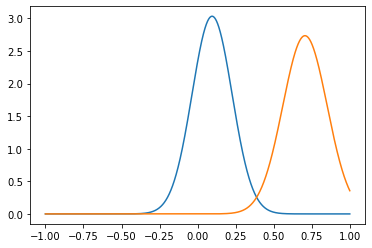

In [14]:
# visualize two Gaussian distributions, 
x  = np.linspace(-1, 1, 5000)
y_pdf1 = ss.norm.pdf(x, mu_current[0], sigma_current[0])
y_pdf2 = ss.norm.pdf(x, mu_current[1], sigma_current[1])
plt.plot(x, y_pdf1, label='pdf')
plt.plot(x, y_pdf2, label='pdf')
plt.show()

[]

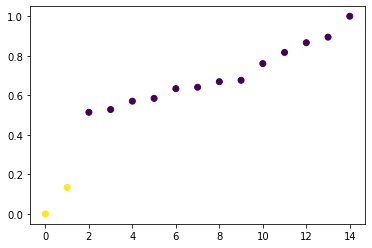

In [15]:
# visulize the clustering results
x = np.arange(0,15,1)
group = label
plt.scatter(x,y,c=group,label=label)
plt.plot()